Data Pre-Processing

- Let's Start with importing the needed libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('gd_jobs.csv')
df.tail()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
895,Operations Lead - Platform Health (Data Analys...,₹510K - ₹900K (Glassdoor Est.),Job Overview:\nAs an Operations Lead - Platfor...,4.3,sharechat\n4.3,Bangalore,Size\n1 to 50 Employees,Type\nCompany - Private,Revenue\nUnknown / Non-Applicable,-1,-1,-1
896,Data Engineer,₹510K - ₹900K (Glassdoor Est.),The Data Engineer is responsible for design OT...,3.0,TalentNex Consulting Pte Ltd.,India,Size\n1 to 50 Employees,Type\nCompany - Private,Revenue\nUnknown / Non-Applicable,-1,-1,-1
897,Sr. Analyst- Data Science,₹510K - ₹900K (Glassdoor Est.),Company Description\n\nAbout Merkle\nMerkle is...,3.9,Merkle Sokrati\n3.9,Pune,Size\n501 to 1000 Employees,Founded\n2009,Type\nCompany - Private,Industry\nAdvertising & Marketing,Sector\nBusiness Service,Revenue\nUnknown / Non-Applicable
898,Data Engineer,₹510K - ₹900K (Glassdoor Est.),"MUST HAVE EXPERIENCE IN HIVE, SPARK, AWS/AZURE...",3.6,Symphony Talent\n3.6,Bangalore,Size\n201 to 500 Employees,Type\nCompany - Private,Industry\nEnterprise Software & Network Solutions,Sector\nInformation Technology,Revenue\nUnknown / Non-Applicable,-1
899,Data Engineer,₹510K - ₹900K (Glassdoor Est.),Employment Type: Permanent\n\nExperience Level...,2.9,NCG,Mumbai,Size\n1 to 50 Employees,Founded\n2010,Type\nCompany - Private,Industry\nAdvertising & Marketing,Sector\nBusiness Service,Revenue\nUnknown / Non-Applicable


In [3]:
df.shape

(900, 12)

Filter the Data out, by removing all the entries whose salary estimate is not present.

In [4]:
df1 = df[df['Salary Estimate']!='-1']
df1.shape

(866, 12)

In [5]:
df1.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
32,Senior Python Data Engineer,₹433K - ₹763K (Glassdoor Est.),"StartUs Insights, an international data scienc...",4.6,StartUs Insights\n4.6,Remote,Size\n1 to 50 Employees,Founded\n2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD)
33,Senior Big Data Engineer (Python),₹433K - ₹763K (Glassdoor Est.),"StartUs Insights, an international data scienc...",4.6,StartUs Insights\n4.6,Remote,Size\n1 to 50 Employees,Founded\n2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD)
34,Data Scientist,₹433K - ₹763K (Glassdoor Est.),About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik\n3.9,Gurgaon,Size\n201 to 500 Employees,Founded\n2009,Type\nCompany - Private,Industry\nFinancial Transaction Processing,Sector\nFinance,Revenue\nUnknown / Non-Applicable
35,Data Scientist,₹433K - ₹763K (Glassdoor Est.),Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,Size\nUnknown,Type\nCompany - Private,Revenue\nUnknown / Non-Applicable,-1,-1,-1
36,Data Scientist,₹433K - ₹763K (Glassdoor Est.),"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters\n4.2,Ahmedabad,Size\n10000+ Employees,Founded\n2008,Type\nCompany - Public,Industry\nEnterprise Software & Network Solutions,Sector\nInformation Technology,Revenue\n$5 to $10 billion (USD)


Let's Start with fixing the 'Salary Estimate' feature:
- need to remove 'glassdoor est...' at last
- remove the ruppee sign.
- remove the commas in the data.

In [6]:
df1['Salary Estimate'] = df1['Salary Estimate'].apply(lambda x: x.split('(')[0])
df1.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
32,Senior Python Data Engineer,₹433K - ₹763K,"StartUs Insights, an international data scienc...",4.6,StartUs Insights\n4.6,Remote,Size\n1 to 50 Employees,Founded\n2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD)
33,Senior Big Data Engineer (Python),₹433K - ₹763K,"StartUs Insights, an international data scienc...",4.6,StartUs Insights\n4.6,Remote,Size\n1 to 50 Employees,Founded\n2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD)
34,Data Scientist,₹433K - ₹763K,About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik\n3.9,Gurgaon,Size\n201 to 500 Employees,Founded\n2009,Type\nCompany - Private,Industry\nFinancial Transaction Processing,Sector\nFinance,Revenue\nUnknown / Non-Applicable
35,Data Scientist,₹433K - ₹763K,Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,Size\nUnknown,Type\nCompany - Private,Revenue\nUnknown / Non-Applicable,-1,-1,-1
36,Data Scientist,₹433K - ₹763K,"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters\n4.2,Ahmedabad,Size\n10000+ Employees,Founded\n2008,Type\nCompany - Public,Industry\nEnterprise Software & Network Solutions,Sector\nInformation Technology,Revenue\n$5 to $10 billion (USD)


In [7]:
df1['Salary Estimate'].value_counts()

₹433K - ₹763K       32
₹335K - ₹778K       30
₹437K - ₹997K       30
₹527K - ₹789K       30
₹204K - ₹607K       30
₹510K - ₹900K       30
₹286K - ₹759K       30
₹664K - ₹747K       30
₹834K - ₹884K       30
₹653K - ₹785K       30
₹600K - ₹856K       30
₹769K - ₹920K       30
₹464K - ₹789K       30
₹460K - ₹649K       30
₹658K - ₹946K       30
₹450K - ₹900K       30
₹307K - ₹640K       30
₹451K - ₹643K       30
₹509K - ₹786K       30
₹522K - ₹587K       30
₹464K - ₹1,000K     30
₹469K - ₹732K       30
₹583K - ₹796K       30
₹996K - ₹1,048K     30
₹523K - ₹943K       30
₹532K - ₹949K       30
₹633K - ₹808K       30
₹499K - ₹715K       27
₹370K - ₹665K       27
Name: Salary Estimate, dtype: int64

In [8]:
df1['Salary Estimate'] = df1['Salary Estimate'].apply(lambda x: x.replace('K','000').replace('₹','').replace(',',''))
df1['Salary Estimate'].value_counts()

433000 - 763000      32
664000 - 747000      30
633000 - 808000      30
335000 - 778000      30
600000 - 856000      30
204000 - 607000      30
527000 - 789000      30
286000 - 759000      30
464000 - 1000000     30
523000 - 943000      30
437000 - 997000      30
834000 - 884000      30
996000 - 1048000     30
658000 - 946000      30
653000 - 785000      30
450000 - 900000      30
509000 - 786000      30
583000 - 796000      30
532000 - 949000      30
469000 - 732000      30
307000 - 640000      30
451000 - 643000      30
460000 - 649000      30
510000 - 900000      30
464000 - 789000      30
769000 - 920000      30
522000 - 587000      30
370000 - 665000      27
499000 - 715000      27
Name: Salary Estimate, dtype: int64

Let's Introduce a new feature 'avg_salary', which we engineer through the salary estimate given.

In [9]:
min_sal = df1['Salary Estimate'].apply(lambda x: int(x.split('-')[0]))
max_sal = df1['Salary Estimate'].apply(lambda x: int(x.split('-')[1]))

df1['avg_salary'] = (min_sal+max_sal)/2
df1.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,avg_salary
32,Senior Python Data Engineer,433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights\n4.6,Remote,Size\n1 to 50 Employees,Founded\n2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD),598000.0
33,Senior Big Data Engineer (Python),433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights\n4.6,Remote,Size\n1 to 50 Employees,Founded\n2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD),598000.0
34,Data Scientist,433000 - 763000,About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik\n3.9,Gurgaon,Size\n201 to 500 Employees,Founded\n2009,Type\nCompany - Private,Industry\nFinancial Transaction Processing,Sector\nFinance,Revenue\nUnknown / Non-Applicable,598000.0
35,Data Scientist,433000 - 763000,Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,Size\nUnknown,Type\nCompany - Private,Revenue\nUnknown / Non-Applicable,-1,-1,-1,598000.0
36,Data Scientist,433000 - 763000,"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters\n4.2,Ahmedabad,Size\n10000+ Employees,Founded\n2008,Type\nCompany - Public,Industry\nEnterprise Software & Network Solutions,Sector\nInformation Technology,Revenue\n$5 to $10 billion (USD),598000.0


We further need to fix 'Company Name', as given below:

In [10]:
df1['Company Name']

32             StartUs Insights\n4.6
33             StartUs Insights\n4.6
34                     MobiKwik\n3.9
35                           R3coder
36              Thomson Reuters\n4.2
                   ...              
895                   sharechat\n4.3
896    TalentNex Consulting Pte Ltd.
897              Merkle Sokrati\n3.9
898             Symphony Talent\n3.6
899                              NCG
Name: Company Name, Length: 866, dtype: object

In [11]:
df1['Company Name'] = df1.apply(lambda x: x['Company Name'][:-4] if x['Rating'] > 0 else x['Company Name'], axis = 1)
df1['Company Name'].head()

32    StartUs Insights
33    StartUs Insights
34            MobiKwik
35             R3coder
36     Thomson Reuters
Name: Company Name, dtype: object

In [12]:
df1['Location'].value_counts()

Bangalore             359
Pune                   76
Hyderābād              75
Mumbai                 68
Gurgaon                47
Chennai                43
Noida                  36
New Delhi              22
India                  21
Remote                 20
Calcutta               13
Maharashtra            11
Cochin                  9
Ahmedabad               7
Vadodara                7
SAS Nagar               5
Chandigarh              4
Mysore                  4
Thiruvananthapuram      4
Coimbatore              4
Vijayawāda              3
Eranakulam              3
Karnataka               3
Uttar Pradesh           2
Tiruchchirāppalli       2
Visakhapatnam           2
Jamshedpur              2
Indore                  2
Navi Mumbai             2
Telangana               1
Kālkāji Devi            1
Calicut                 1
Nāgpur                  1
Bhopal                  1
Salem                   1
Guntūr                  1
Guwahati                1
Āgra                    1
Andhra Prade

Fixing 'Founded' feature

In [13]:
df1['Founded']

32               Founded\n2014
33               Founded\n2014
34               Founded\n2009
35     Type\nCompany - Private
36               Founded\n2008
                ...           
895    Type\nCompany - Private
896    Type\nCompany - Private
897              Founded\n2009
898    Type\nCompany - Private
899              Founded\n2010
Name: Founded, Length: 866, dtype: object

In [14]:
new = []
for x in df1['Founded']:
    try:
        x = int(x[-4:])
        new.append(x)
    except:
        x = -1
        new.append(x)
    
df1['Founded'] = new

In [15]:
df1['Founded'].value_counts()

-1       265
 1994     25
 2015     24
 1998     24
 2014     22
        ... 
 1943      1
 1670      1
 1956      1
 1962      1
 2021      1
Name: Founded, Length: 115, dtype: int64

As the data we been fixing is sub part of the dataset we scrapped, we need to reset the index.

In [16]:
df1 = df1.reset_index(drop = True)
df1.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,avg_salary
0,Senior Python Data Engineer,433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,Size\n1 to 50 Employees,2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD),598000.0
1,Senior Big Data Engineer (Python),433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,Size\n1 to 50 Employees,2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD),598000.0
2,Data Scientist,433000 - 763000,About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik,Gurgaon,Size\n201 to 500 Employees,2009,Type\nCompany - Private,Industry\nFinancial Transaction Processing,Sector\nFinance,Revenue\nUnknown / Non-Applicable,598000.0
3,Data Scientist,433000 - 763000,Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,Size\nUnknown,-1,Revenue\nUnknown / Non-Applicable,-1,-1,-1,598000.0
4,Data Scientist,433000 - 763000,"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters,Ahmedabad,Size\n10000+ Employees,2008,Type\nCompany - Public,Industry\nEnterprise Software & Network Solutions,Sector\nInformation Technology,Revenue\n$5 to $10 billion (USD),598000.0


Now, let's take out some useful info from the job description we are provided with.
Like the top skills/tools a Data Scientist should be ideally familiar with.
 
referred to 'https://research.aimultiple.com/data-science-tools/' for choosing what skills/tools are the most desired.
List was quite a bit, still i chose to use some skills/tools for analysis.
They were:
- Python
- Sql
- TeansorFlow
- Excel
- Cloud

In [17]:
df1['Job Description'][0]

"StartUs Insights, an international data science company mapping the world's information on startups, scaleups and their technologies.\nWe operate a proprietary DAG stateful-stream-processing information retrieval system (think of a search engine). We run container-based with distributed and scalable agents.\nOur Stack is Python, Kafka, Scrapy, PostgreSQL, Elastic Search, Docker.\nIF YOU ARE:\nPassionate about working on the world's largest startup search engine and use your talent planning, building and operating critical information systems that convert raw data to knowledge - then you are at the right place!"

In [18]:
df1['python_req'] = df1['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df1['python_req'].value_counts()

0    683
1    183
Name: python_req, dtype: int64

In [19]:
df1['sql_req'] = df1['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df1['sql_req'].value_counts()

0    729
1    137
Name: sql_req, dtype: int64

In [20]:
df1['Tensorflow_req'] = df1['Job Description'].apply(lambda x: 1 if 'tensorflow' in x.lower() or 'tensor-flow' in x.lower() else 0)
df1['Tensorflow_req'].value_counts()

0    818
1     48
Name: Tensorflow_req, dtype: int64

In [21]:
df1['excel_req'] = df1['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df1['excel_req'].value_counts()

0    766
1    100
Name: excel_req, dtype: int64

In [22]:
df1['cloud_req'] = df1['Job Description'].apply(lambda x: 1 if 'cloud' in x.lower() else 0)
df1['cloud_req'].value_counts()

0    750
1    116
Name: cloud_req, dtype: int64

Fixing the 'Size' feature, and further using it to engineer the total employees in the company.

In [23]:
df1['Size'] = df1['Size'].apply(lambda x: x[5:-10].replace('+',''))
df1['Size']

0          1 to 50
1          1 to 50
2       201 to 500
3                 
4            10000
          ...     
861        1 to 50
862        1 to 50
863    501 to 1000
864     201 to 500
865        1 to 50
Name: Size, Length: 866, dtype: object

In [24]:
min_ep = df1['Size'].apply(lambda x: int(x.split('to')[0]) if 'to' in x else 0)
max_ep = df1['Size'].apply(lambda x: int(x.split('to')[1]) if 'to' in x else (int(x) if len(x)!= 0  else -1))

df1['total emp'] = max_ep
df1.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,avg_salary,python_req,sql_req,Tensorflow_req,excel_req,cloud_req,total emp
0,Senior Python Data Engineer,433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,1 to 50,2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD),598000.0,1,1,0,0,0,50
1,Senior Big Data Engineer (Python),433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,1 to 50,2014,Type\nCompany - Private,Industry\nInternet,Sector\nInformation Technology,Revenue\n$1 to $5 million (USD),598000.0,1,1,0,0,0,50
2,Data Scientist,433000 - 763000,About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik,Gurgaon,201 to 500,2009,Type\nCompany - Private,Industry\nFinancial Transaction Processing,Sector\nFinance,Revenue\nUnknown / Non-Applicable,598000.0,0,0,0,0,0,500
3,Data Scientist,433000 - 763000,Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,,-1,Revenue\nUnknown / Non-Applicable,-1,-1,-1,598000.0,0,0,0,0,0,-1
4,Data Scientist,433000 - 763000,"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters,Ahmedabad,10000,2008,Type\nCompany - Public,Industry\nEnterprise Software & Network Solutions,Sector\nInformation Technology,Revenue\n$5 to $10 billion (USD),598000.0,1,0,1,1,1,10000


Further Fixing the features like Industry, Sector, Type of Ownership, Revenue.

In [25]:
df1['Industry'] = df1['Industry'].apply(lambda x: x[x.replace('\n','-').find('-')  +1 : ] if '\n' in x else x) 
df1['Industry'].value_counts()

-1                                         209
IT Service                                 115
Computer Hardware & Software                79
Internet                                    68
Enterprise Software & Network Solutions     56
                                          ... 
Mining & Metals                              1
Fast-Food & Quick-Service Restaurant         1
Primary or Secondary Education               1
Food & Drink Manufacturing                   1
Social Services                              1
Name: Industry, Length: 67, dtype: int64

In [26]:
df1['Sector']= df1['Sector'].astype('str')
df1['Sector'] = df1['Sector'].apply(lambda x: x[x.replace('\n','-').find('-')  +1 : ] if '\n' in x else x)
df1['Sector'] = df1['Sector'].apply(lambda x: str(-1) if '$' in x or 'nan' in x else x)
df1['Sector'].value_counts()

Information Technology              317
-1                                  292
Business Service                    105
Unknown / Non-Applicable             32
Manufacturing                        31
Biotech & Pharmaceutical             21
Healthcare                           13
Retail                               11
Transportation & Logistics           11
Oil, Gas, Energy & Utility            5
Media                                 5
Aerospace & Defence                   4
Telecommunication                     4
Education                             3
Agriculture & Forestry                3
Accounting & Legal                    2
Travel & Tourism                      2
Arts, Entertainment & Recreation      2
Restaurants, Bars & Food Service      1
Non-Profit                            1
Consumer Service                      1
Name: Sector, dtype: int64

In [27]:
df1['Revenue']= df1['Revenue'].astype('str')
df1['Revenue'] = df1['Revenue'].apply(lambda x: x[x.replace('\n','-').find('-')  +1 : ] if '\n' in x else x)
df1['Revenue'] = df1['Revenue'].apply(lambda x: str(-1) if 'nan' in x else x)
df1['Revenue'].value_counts()

-1                                  274
Unknown / Non-Applicable            172
$10+ billion (USD)                  167
$100 to $500 million (USD)           50
$2 to $5 billion (USD)               50
$1 to $2 billion (USD)               25
$10 to $25 million (USD)             24
$5 to $10 billion (USD)              22
$500 million to $1 billion (USD)     19
$1 to $5 million (USD)               17
$5 to $10 million (USD)              15
$25 to $50 million (USD)             12
$50 to $100 million (USD)            10
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [28]:
part = ['Company - Private','Company - Public','Nonprofit Organization','Subsidiary or Business Segment','Government','Hospital','College / University','Other Organization','School / School District','Unknown']
df1['Type of ownership']= df1['Type of ownership'].astype('str')
df1['Type of ownership'] = df1['Type of ownership'].apply(lambda x: x[x.replace('\n','-').find('-')  +1 : ] if '\n' in x else x)
df1['Type of ownership'] = df1['Type of ownership'].apply(lambda x: x if x in part else str(-1))
df1['Type of ownership'].value_counts()

Company - Private                 296
Company - Public                  273
-1                                271
Subsidiary or Business Segment     22
Unknown                             4
Name: Type of ownership, dtype: int64

In [29]:
df1

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,avg_salary,python_req,sql_req,Tensorflow_req,excel_req,cloud_req,total emp
0,Senior Python Data Engineer,433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,1 to 50,2014,Company - Private,Internet,Information Technology,$1 to $5 million (USD),598000.0,1,1,0,0,0,50
1,Senior Big Data Engineer (Python),433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,1 to 50,2014,Company - Private,Internet,Information Technology,$1 to $5 million (USD),598000.0,1,1,0,0,0,50
2,Data Scientist,433000 - 763000,About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik,Gurgaon,201 to 500,2009,Company - Private,Financial Transaction Processing,-1,Unknown / Non-Applicable,598000.0,0,0,0,0,0,500
3,Data Scientist,433000 - 763000,Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,,-1,-1,-1,-1,-1,598000.0,0,0,0,0,0,-1
4,Data Scientist,433000 - 763000,"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters,Ahmedabad,10000,2008,Company - Public,Enterprise Software & Network Solutions,Information Technology,$5 to $10 billion (USD),598000.0,1,0,1,1,1,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,Operations Lead - Platform Health (Data Analys...,510000 - 900000,Job Overview:\nAs an Operations Lead - Platfor...,4.3,sharechat,Bangalore,1 to 50,-1,-1,-1,-1,-1,705000.0,0,1,0,1,0,50
862,Data Engineer,510000 - 900000,The Data Engineer is responsible for design OT...,3.0,TalentNex Consulting Pte,India,1 to 50,-1,-1,-1,-1,-1,705000.0,0,0,0,0,0,50
863,Sr. Analyst- Data Science,510000 - 900000,Company Description\n\nAbout Merkle\nMerkle is...,3.9,Merkle Sokrati,Pune,501 to 1000,2009,Company - Private,Advertising & Marketing,Business Service,Unknown / Non-Applicable,705000.0,0,0,0,0,0,1000
864,Data Engineer,510000 - 900000,"MUST HAVE EXPERIENCE IN HIVE, SPARK, AWS/AZURE...",3.6,Symphony Talent,Bangalore,201 to 500,-1,-1,Information Technology,Unknown / Non-Applicable,-1,705000.0,0,1,0,0,0,500


Data looks fine now, let's perform some EDA.

In [30]:
df1.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'avg_salary', 'python_req', 'sql_req',
       'Tensorflow_req', 'excel_req', 'cloud_req', 'total emp'],
      dtype='object')

In [31]:
a = df1['Job Title'].value_counts()
df_title = pd.DataFrame(a)
df_title

,Job Title
Data Scientist,200
Data Engineer,143
Senior Data Scientist,65
Data Analyst,38
Machine Learning Engineer,15
...,...
Senior Data Scientist - Customer Platform,1
Data Scientist - Computer Vision,1
Research Data Scientist,1
Data Scientist (Credit Risk),1


building more features for the data set, to simplify our EDA 

In [32]:
def group_jobs(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'Misc'

    
def level(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower() or '- ii' in title.lower() or '2' in title or '3' in title or '- iii' in title.lower():
            return 'Senior'
    elif 'junior' in title.lower() or 'jr.' in title.lower() or 'jr' in title.lower() or '1' in title or '- i' in title.lower():
        return 'Junior'
    else:
        return 'Misc'
    

In [33]:
df1['jobs_grouped'] = df1['Job Title'].apply(lambda x: group_jobs(x))
df1['jobs_grouped'].value_counts()

data scientist    545
data engineer     172
analyst            67
Misc               57
mle                18
manager             6
director            1
Name: jobs_grouped, dtype: int64

In [34]:
df1['level'] = df1['Job Title'].apply(lambda x: level(x))
df1['level'].value_counts()

Misc      643
Senior    202
Junior     21
Name: level, dtype: int64

In [35]:
df1['desc_len'] = df1['Job Description'].apply(lambda x: len(x))
df1['desc_len']

0       613
1       613
2      1830
3       758
4      2446
       ... 
861    1413
862     844
863     721
864     531
865    1129
Name: desc_len, Length: 866, dtype: int64

In [36]:
df1.describe()

,Rating,Founded,avg_salary,python_req,sql_req,Tensorflow_req,excel_req,cloud_req,total emp,desc_len
count,866.000000,866.000000,8.660000e+02,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,3.372748,1371.106236,6.647431e+05,0.211316,0.158199,0.055427,0.115473,0.133949,4235.423788,1080.744804
std,1.671715,912.733476,1.256647e+05,0.408478,0.365138,0.228945,0.319777,0.340795,4496.125066,1033.640585
min,-1.000000,-1.000000,4.055000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,38.000000
25%,3.500000,-1.000000,5.565000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,557.750000
50%,3.900000,1975.000000,6.750000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,777.500000
75%,4.300000,2004.000000,7.280000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,10000.000000,1124.500000
max,5.000000,2021.000000,1.022000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,10000.000000,10677.000000


<AxesSubplot:>

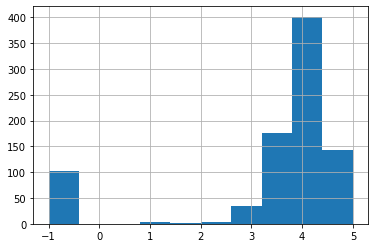

In [37]:
idx = ['Rating', 'avg_salary', 'desc_len', 'company_age','total emp']
df1['Rating'].hist()

<AxesSubplot:>

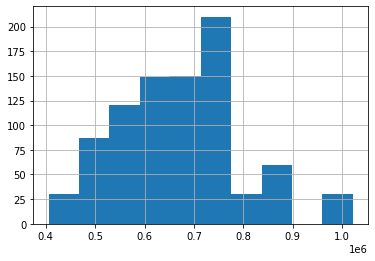

In [38]:
df1['avg_salary'].hist()

<AxesSubplot:>

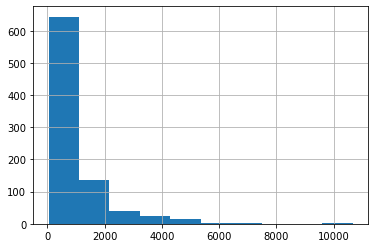

In [39]:
df1['desc_len'].hist()

<AxesSubplot:>

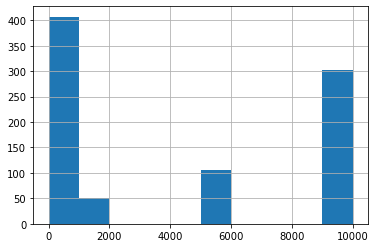

In [40]:
df1['total emp'].hist()

<AxesSubplot:>

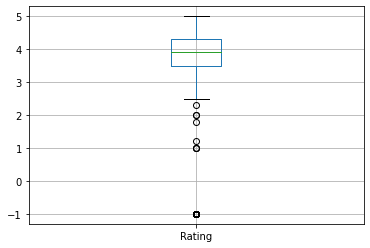

In [41]:
df1.boxplot(column = 'Rating')

<AxesSubplot:>

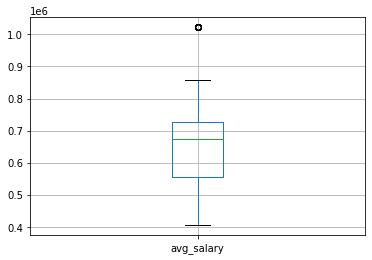

In [42]:
df1.boxplot(column = 'avg_salary')

<AxesSubplot:>

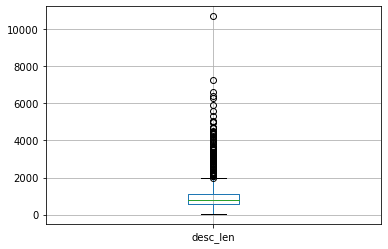

In [43]:
df1.boxplot(column = 'desc_len')

<AxesSubplot:>

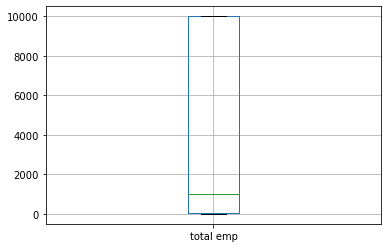

In [44]:
df1.boxplot('total emp')

Let's calculate Company's current age.

In [45]:
df1['company_age'] = df1['Founded'].apply(lambda x: 2022 - int(x) if x != -1 else -1)

In [46]:
df1['company_age'].value_counts()

-1      265
 28      25
 24      24
 7       24
 22      22
       ... 
 116      1
 117      1
 120      1
 121      1
 352      1
Name: company_age, Length: 115, dtype: int64

<AxesSubplot:>

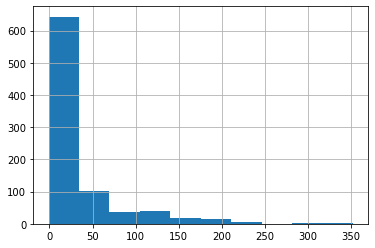

In [47]:
df1['company_age'].hist()

<AxesSubplot:>

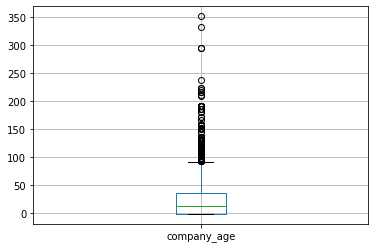

In [48]:
df1.boxplot('company_age')

In [49]:
df1[idx].corr()

,Rating,avg_salary,desc_len,company_age,total emp
Rating,1.000000,-0.016148,0.116140,0.210311,0.327074
avg_salary,-0.016148,1.000000,-0.005492,0.048368,0.008680
desc_len,0.116140,-0.005492,1.000000,0.048144,0.111131
company_age,0.210311,0.048368,0.048144,1.000000,0.620200
total emp,0.327074,0.008680,0.111131,0.620200,1.000000


<AxesSubplot:>

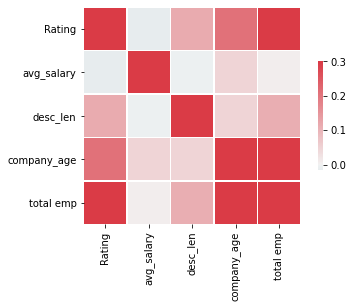

In [50]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df1[idx].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

By observing the correlations above, we can see that 'total emp' feature is highly correlated with multiple other features. So it's better to drop it, because it won't be giving us much of any results. It's just increasing the number of columns in our dataset.

In [51]:
idx = ['Rating', 'avg_salary', 'desc_len', 'company_age']

In [52]:
df1 = df1.drop('total emp', axis=1)

In [53]:
df1.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'avg_salary', 'python_req', 'sql_req',
       'Tensorflow_req', 'excel_req', 'cloud_req', 'jobs_grouped', 'level',
       'desc_len', 'company_age'],
      dtype='object')

In [54]:
df1[idx].corr()

,Rating,avg_salary,desc_len,company_age
Rating,1.000000,-0.016148,0.116140,0.210311
avg_salary,-0.016148,1.000000,-0.005492,0.048368
desc_len,0.116140,-0.005492,1.000000,0.048144
company_age,0.210311,0.048368,0.048144,1.000000


<AxesSubplot:>

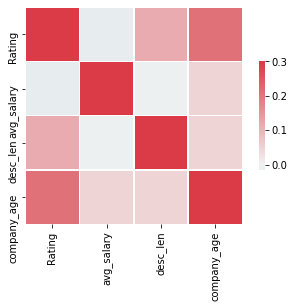

In [55]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df1[idx].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [56]:
df1.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'avg_salary', 'python_req', 'sql_req',
       'Tensorflow_req', 'excel_req', 'cloud_req', 'jobs_grouped', 'level',
       'desc_len', 'company_age'],
      dtype='object')

Above we worked with Numerical columns, now let's see how are categorical columns doing.

In [57]:
cat_data = df1[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'python_req', 'sql_req', 'Tensorflow_req', 'excel_req', 'cloud_req', 'jobs_grouped', 'level']]

graph for Location: total = 39


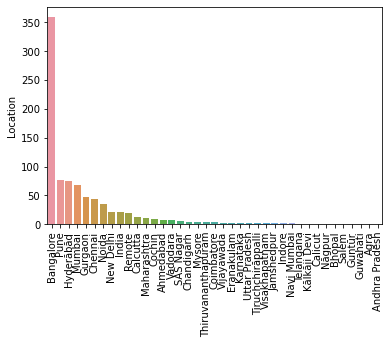

graph for Size: total = 8


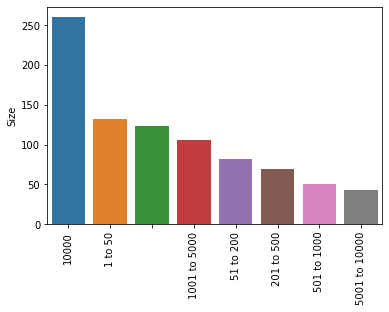

graph for Type of ownership: total = 5


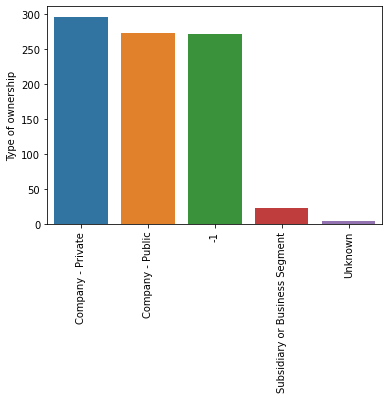

graph for Industry: total = 67


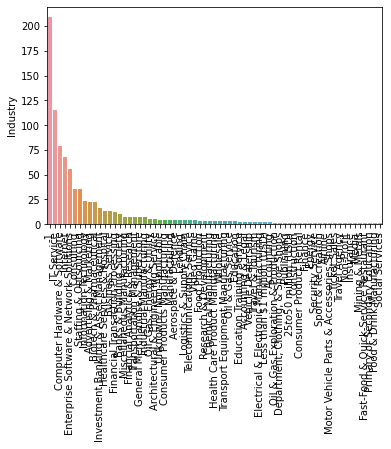

graph for Sector: total = 21


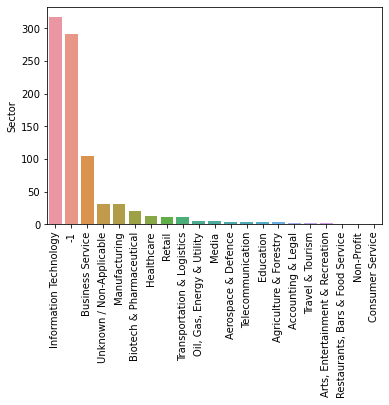

graph for Revenue: total = 14


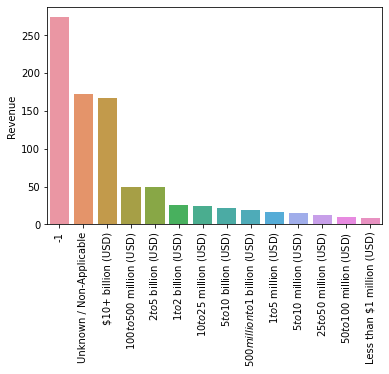

graph for Company Name: total = 561


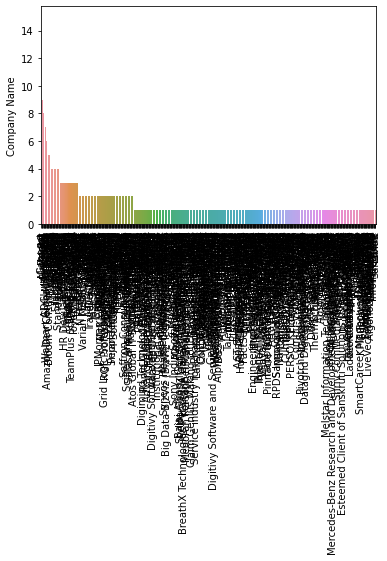

graph for python_req: total = 2


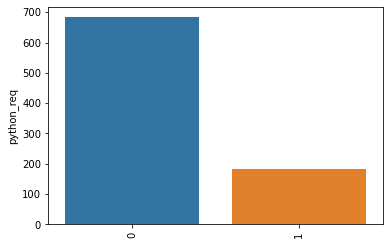

graph for sql_req: total = 2


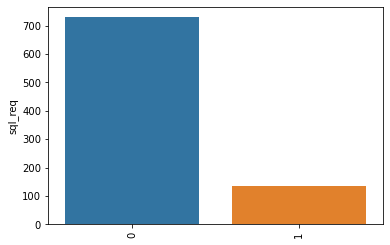

graph for Tensorflow_req: total = 2


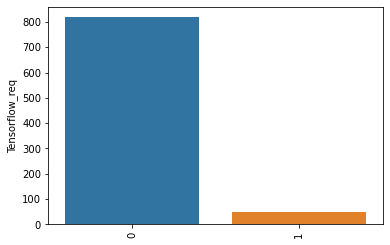

graph for excel_req: total = 2


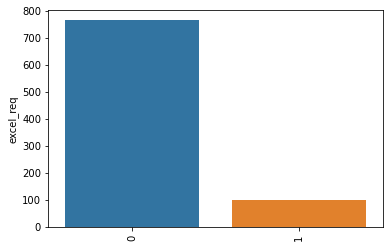

graph for cloud_req: total = 2


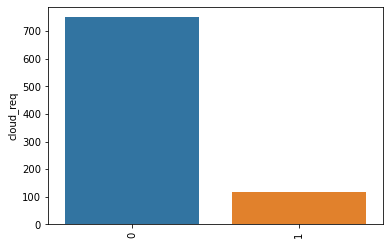

graph for jobs_grouped: total = 7


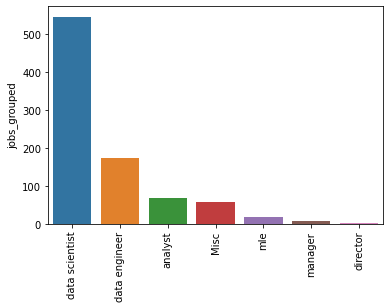

graph for level: total = 3


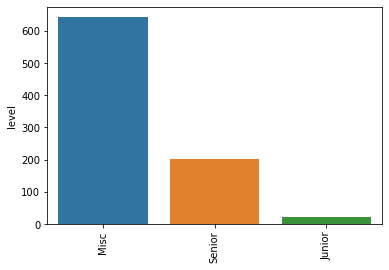

In [58]:
for i in cat_data.columns:
    cat_num = cat_data[i].value_counts()
    print("graph for {}: total = {}".format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


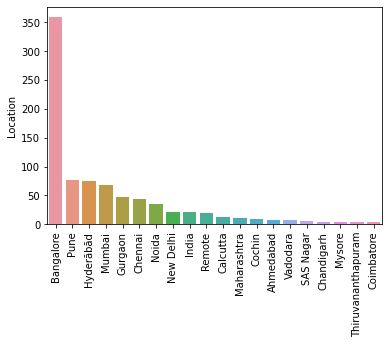

graph for Industry: total = 20


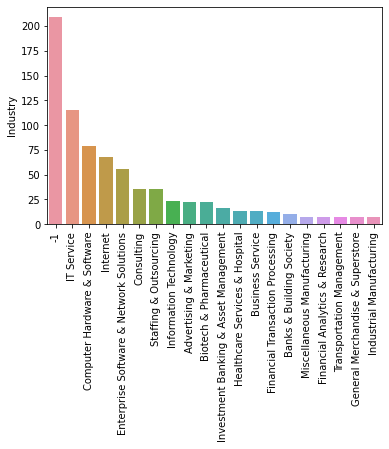

graph for Company Name: total = 20


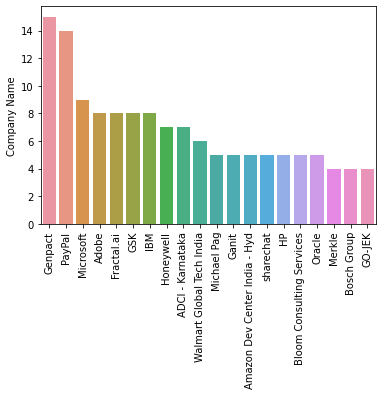

In [59]:
for i in ['Location','Industry', 'Company Name']:
    cat_num = df1[i].value_counts()[0:20]
    print("graph for {}: total = {}".format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Let's Create tables of features with 'avg_salary' and observe how are they related, and what insights do we generate.

In [60]:
pd.pivot_table(df1, index = 'jobs_grouped', values = 'avg_salary')

,avg_salary
jobs_grouped,
Misc,685105.263158
analyst,666888.059701
data engineer,657686.046512
data scientist,662463.302752
director,720500.000000
manager,627333.333333
mle,738111.111111


In [61]:
pd.pivot_table(df1, index = ['jobs_grouped', 'level'], values = 'avg_salary')

avg_salary
jobs_grouped   level                
Misc           Junior  694875.000000
               Misc    686432.432432
               Senior  679593.750000
analyst        Misc    669228.813559
               Senior  649625.000000
data engineer  Junior  705000.000000
               Misc    657558.641975
               Senior  648437.500000
data scientist Junior  686366.666667
               Misc    659333.795014
               Senior  667026.627219
director       Misc    720500.000000
manager        Misc    627333.333333
mle            Misc    748794.117647
               Senior  556500.000000

Here, the data in above table is not clearly showing pratical results, this indicates that the data we collected has quite alot of missing values like either no proper job role/job description was provided by the company or no level were defined properly. Therefore, we observe the avg. salary for a job profile is having higher pay for junior levels than senior which is clearly not correct.

Job postings need to be done carefully, so the candidate can make informed choice of applying being aware of what he/she is getting into.

In [65]:
pd.pivot_table(df1, index = [ 'Location','jobs_grouped'], values = 'avg_salary').sort_values('Location', ascending = False)

avg_salary
Location       jobs_grouped                 
Āgra           data scientist  473500.000000
Visakhapatnam  data scientist  473500.000000
               data engineer   556500.000000
Vijayawāda     data scientist  547000.000000
               analyst         522500.000000
...                                      ...
Bangalore      Misc            673090.909091
Andhra Pradesh analyst         740500.000000
Ahmedabad      data scientist  615300.000000
               analyst         556500.000000
               Misc            705000.000000

[103 rows x 1 columns]

In [67]:
pd.pivot_table(df1[df1['jobs_grouped'] == 'data scientist'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Coimbatore,852000.000000
Kālkāji Devi,844500.000000
Calcutta,776714.285714
Thiruvananthapuram,732000.000000
Calicut,717000.000000
Nāgpur,717000.000000
Maharashtra,689500.000000
Indore,682250.000000
Gurgaon,675250.000000


In [71]:
df1.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'avg_salary', 'python_req', 'sql_req',
       'Tensorflow_req', 'excel_req', 'cloud_req', 'jobs_grouped', 'level',
       'desc_len', 'company_age'],
      dtype='object')

In [72]:
pd.pivot_table(df1, index = 'Rating', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Rating,
1.8,1.022000e+06
2.0,7.670000e+05
2.5,7.320000e+05
2.7,7.170000e+05
4.9,6.985000e+05
3.9,6.921296e+05
1.2,6.895000e+05
2.8,6.895000e+05
4.0,6.848286e+05


In [69]:
pd.pivot_table(df1, index = 'Industry', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Industry,
Non-Profit,859000.0
Energy,844500.0
Consumer Product Rental,802000.0
Motor Vehicle Parts & Accessories Shops,802000.0
Mining & Metals,740500.0
...,...
Education Training Service,550000.0
Oil & Gas Service,545000.0
Security Service,473500.0


In [73]:
pd.pivot_table(df1, index = 'Sector', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Sector,
Consumer Service,802000.000000
Transportation & Logistics,727727.272727
Accounting & Legal,726250.000000
Non-Profit,705000.000000
-1,678342.465753
Aerospace & Defence,676750.000000
Manufacturing,675709.677419
Agriculture & Forestry,665166.666667
Information Technology,662334.384858


In [74]:
pd.pivot_table(df1, index = 'Revenue', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Revenue,
$5 to $10 million (USD),726866.666667
$10+ billion (USD),673754.491018
-1,669647.810219
$25 to $50 million (USD),667500.000000
$100 to $500 million (USD),665010.000000
$1 to $2 billion (USD),661280.000000
Unknown / Non-Applicable,656959.302326
$1 to $5 million (USD),656911.764706
$5 to $10 billion (USD),654295.454545


In [80]:
#either use Founded instead of age, will result the same.
pd.pivot_table(df1, index = 'company_age', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
company_age,
332,1.022000e+06
130,8.943333e+05
210,8.590000e+05
181,8.517500e+05
105,8.445000e+05
...,...
109,5.470000e+05
72,5.428333e+05
32,4.735000e+05


In [81]:
pd.pivot_table(df1, index = 'Type of ownership', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Type of ownership,
Subsidiary or Business Segment,699704.545455
-1,668924.354244
Company - Public,664219.780220
Company - Private,660219.594595
Unknown,559625.000000


In [82]:
pd.pivot_table(df1, index = 'Size', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Size,
,670975.609756
1 to 50,670670.454545
201 to 500,667992.857143
10000,667771.153846
5001 to 10000,666604.651163
1001 to 5000,657669.811321
501 to 1000,653350.000000
51 to 200,648591.463415


In [89]:
pd.pivot_table(df1, index = 'python_req', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
python_req,
0,666254.758419
1,659101.092896


In [88]:
pd.pivot_table(df1, index = 'sql_req', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
sql_req,
0,664849.108368
1,664178.832117


In [85]:
pd.pivot_table(df1, index = 'Tensorflow_req', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Tensorflow_req,
1,674218.750000
0,664187.041565


In [86]:
pd.pivot_table(df1, index = 'excel_req', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
excel_req,
1,678530.000000
0,662943.211488


In [87]:
pd.pivot_table(df1, index = 'cloud_req', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
cloud_req,
1,671198.275862
0,663744.666667


From the above tables few insights can be made, like In India, which sector or industry has highest pay for DS, What skills companies are mostly looking for, like Tensorflow, Cloud, and all. and few more such insights can be made.

In [90]:
df1

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,avg_salary,python_req,sql_req,Tensorflow_req,excel_req,cloud_req,jobs_grouped,level,desc_len,company_age
0,Senior Python Data Engineer,433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,1 to 50,2014,Company - Private,Internet,...,598000.0,1,1,0,0,0,data engineer,Senior,613,8
1,Senior Big Data Engineer (Python),433000 - 763000,"StartUs Insights, an international data scienc...",4.6,StartUs Insights,Remote,1 to 50,2014,Company - Private,Internet,...,598000.0,1,1,0,0,0,data engineer,Senior,613,8
2,Data Scientist,433000 - 763000,About Us:\nMobiKwik is India's largest indepen...,3.9,MobiKwik,Gurgaon,201 to 500,2009,Company - Private,Financial Transaction Processing,...,598000.0,0,0,0,0,0,data scientist,Misc,1830,13
3,Data Scientist,433000 - 763000,Ahmedabad\nBe a part of the movement to revolu...,-1.0,R3coder,Ahmedabad,,-1,-1,-1,...,598000.0,0,0,0,0,0,data scientist,Misc,758,-1
4,Data Scientist,433000 - 763000,"Job Description\n\nOffice No.13, B1, Galaxy Si...",4.2,Thomson Reuters,Ahmedabad,10000,2008,Company - Public,Enterprise Software & Network Solutions,...,598000.0,1,0,1,1,1,data scientist,Misc,2446,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,Operations Lead - Platform Health (Data Analys...,510000 - 900000,Job Overview:\nAs an Operations Lead - Platfor...,4.3,sharechat,Bangalore,1 to 50,-1,-1,-1,...,705000.0,0,1,0,1,0,analyst,Senior,1413,-1
862,Data Engineer,510000 - 900000,The Data Engineer is responsible for design OT...,3.0,TalentNex Consulting Pte,India,1 to 50,-1,-1,-1,...,705000.0,0,0,0,0,0,data engineer,Misc,844,-1
863,Sr. Analyst- Data Science,510000 - 900000,Company Description\n\nAbout Merkle\nMerkle is...,3.9,Merkle Sokrati,Pune,501 to 1000,2009,Company - Private,Advertising & Marketing,...,705000.0,0,0,0,0,0,analyst,Senior,721,13
864,Data Engineer,510000 - 900000,"MUST HAVE EXPERIENCE IN HIVE, SPARK, AWS/AZURE...",3.6,Symphony Talent,Bangalore,201 to 500,-1,-1,Information Technology,...,705000.0,0,1,0,0,0,data engineer,Misc,531,-1


Our Data is ready for Regression_model.

In [ ]:
df1.to_csv('data_ready_for_Model.csv')